# 数据挖掘作业三

## 姓名：林宁 学号：3220190838 

数据集：Hotel booking demand

In [1]:
# 导入必要的包
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score

### 1. 数据预处理 

#### 1.1读取数据集

In [2]:
dataset = pd.read_csv('hotel_bookings.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


#### 1.2 查看数据的缺失值，并将每列的缺失值数量按降序排序

In [3]:
dataset.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

从结果看出数据集有4列存在缺失值，它们分别为 children、country、agent、company。

#### 1.3 填充缺失值

按照如下标准进行填充：
+ children: NA -> 0
+ country: NA -> 'N.A.'
+ agent: NA -> 0
+ company: NA -> 0

In [4]:
dataset.fillna({'children' : 0, 'country' : 'N. A.', 'agent' : 0, 'company' : 0}, inplace = True)

In [5]:
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

由上面结果看出填充后的数据集没有缺失值

#### 1.4 查看处理后数据集的5数概况

In [6]:
dataset.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,21-10-15
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,74.828319,10.775157,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,107.141953,53.943884,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,7.000000,0.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,9.000000,0.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,152.000000,0.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### 2.基本情况：查看城市酒店和假日酒店预订需求和入住率比较

,cancelations,hotel,reservations
0,11122,Resort Hotel,40060
1,33102,City Hotel,79330


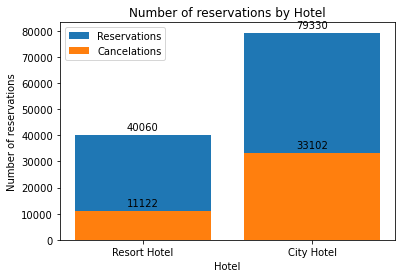

In [7]:
def auto_label(ax, container):
    for c in container:
        height = c.get_height()
        
        ax.annotate('{}'.format(height),
                    xy = (c.get_x() + c.get_width() / 2, height),
                    xytext = (0, 3),  #3 points vertical offset
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')

def show_number_reservations():
    dict = []
    
    for hotel in dataset.hotel.unique():
        dict.append({'hotel' : hotel, 
                     'reservations' : len(dataset.loc[dataset.hotel == hotel, 'hotel']), 
                     'cancelations' : len(dataset.loc[(dataset.hotel == hotel) & (dataset.is_canceled == 1), 'hotel'])})
    
    data = pd.DataFrame(dict)
    
    fig, ax = plt.subplots()
    
    reserv_bar = ax.bar(data.hotel, data.reservations, label = 'Reservations')
    cancel_bar = ax.bar(data.hotel, data.cancelations, label = 'Cancelations')
            
    plt.title('Number of reservations by Hotel')
    plt.xlabel('Hotel')
    plt.ylabel('Number of reservations')
    plt.legend()

    auto_label(ax, reserv_bar)
    auto_label(ax, cancel_bar)
    
    return data

show_number_reservations()

由结果看出，共两种酒店，分别为城市酒店和假日酒店，他们预订和取消量分别为：
+ 城市酒店预定量：79330
+ 城市酒店取消量：33102
+ 假日酒店预定量：40060
+ 假日酒店取消量：11122

从这些数据分析出 入住率大概占预订需求的60%，即约40%的顾客会在后期取消酒店入住计划

### 3. 用户行为：提前预订时间、入住时长、预订间隔、餐食预订等情况

#### 3.1 分别查看和可视化被取消的城市酒店和假日酒店【数值型数据的均值】

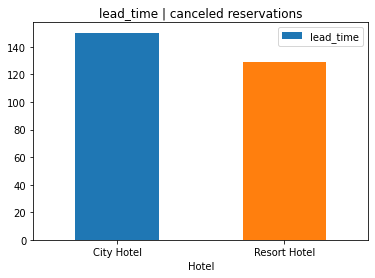

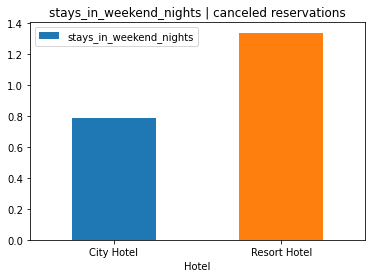

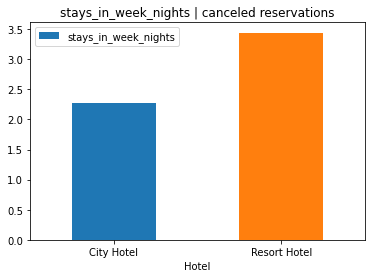

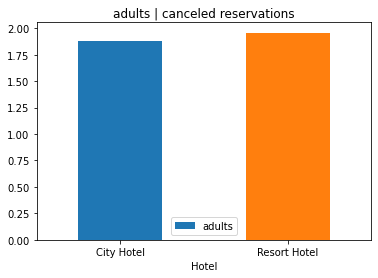

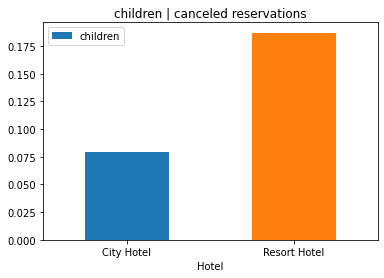

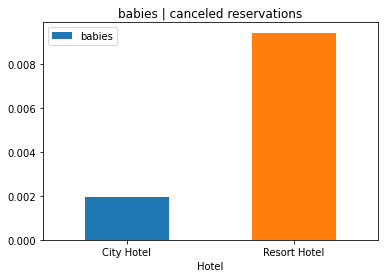

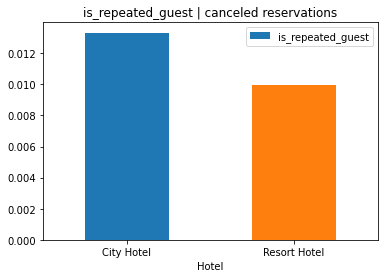

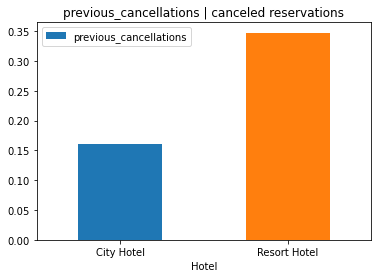

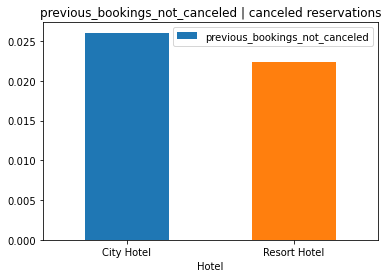

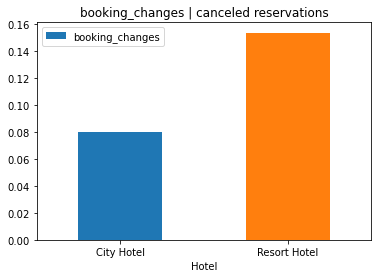

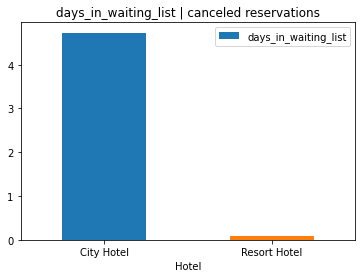

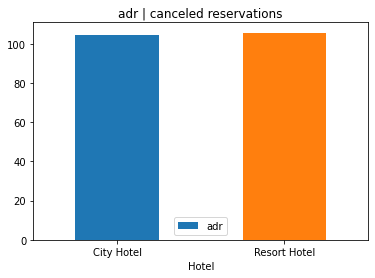

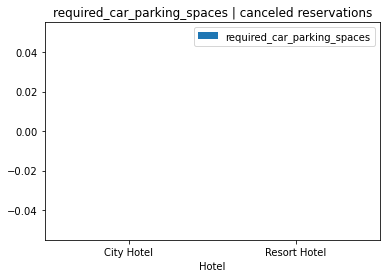

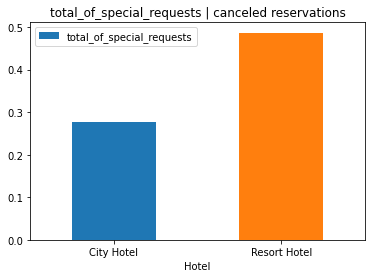

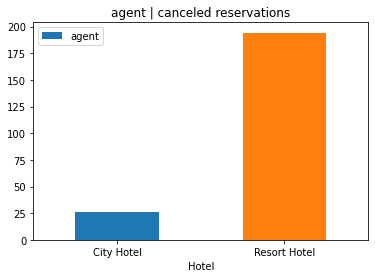

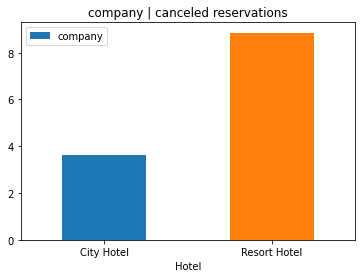

,attribute,hotel,value
0,lead_time,City Hotel,150.281222
1,lead_time,Resort Hotel,128.680543
2,stays_in_weekend_nights,City Hotel,0.787505
3,stays_in_weekend_nights,Resort Hotel,1.335281
4,stays_in_week_nights,City Hotel,2.266781
5,stays_in_week_nights,Resort Hotel,3.440299
6,adults,City Hotel,1.882907
7,adults,Resort Hotel,1.957741
8,children,City Hotel,0.079451
9,children,Resort Hotel,0.187017


In [8]:
attrs = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
         'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests','agent', 'company']


def show_attributes(canceled, attributes):
    dict = []
    
    for attr in attributes:        
        data = dataset.loc[dataset.is_canceled == (1 if canceled else 0), ['hotel', attr]]\
                      .groupby('hotel').agg(['mean']).reset_index()
        
        for i in range(len(dataset.hotel.unique())):
            dict.append({'hotel' : data.iat[i, 0], 'attribute' : attr, 'value' : data.iat[i, 1]})
    
    result = pd.DataFrame(dict)
    
    for attr in attributes:
        ax = result.loc[result.attribute == attr].plot('hotel', 'value', kind = 'bar', label = attr)
        ax.set_title(attr + (' | canceled reservations' if canceled else ''))
        ax.set_xlabel('Hotel')
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment = 'center')
        plt.show()
    
    return result

show_attributes(True, attrs)

#### 3.2 分别查看被取消的城市酒店和假日酒店【标称型数据的数量】

In [9]:
attrs = ['meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type',
         'deposit_type', 'customer_type']

def list_attributes(canceled, attributes):
    dict = []

    for attr in attributes:        
        data = dataset.loc[dataset.is_canceled == (1 if canceled else 0), ['hotel', attr]]

        operation = 'count' 
            
        data = data.groupby('hotel').agg([operation]).reset_index()

        for i in range(len(dataset.hotel.unique())):
            dict.append({'hotel' : data.iat[i, 0], 'attribute' : attr, 'type': operation, 'value' : data.iat[i, 1]})

    return pd.DataFrame(dict)

list_attributes(True, attrs)

,attribute,hotel,type,value
0,meal,City Hotel,count,33102
1,meal,Resort Hotel,count,11122
2,country,City Hotel,count,33102
3,country,Resort Hotel,count,11122
4,market_segment,City Hotel,count,33102
5,market_segment,Resort Hotel,count,11122
6,distribution_channel,City Hotel,count,33102
7,distribution_channel,Resort Hotel,count,11122
8,reserved_room_type,City Hotel,count,33102
9,reserved_room_type,Resort Hotel,count,11122


### 4. 预定酒店的顾客大多来自哪些国家 

#### 4.1 入住酒店的顾客大多数来自哪些国家

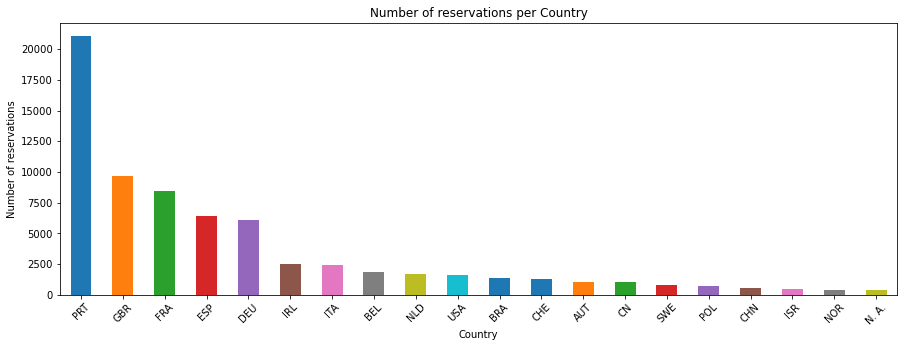

country
PRT      21071
GBR       9676
FRA       8481
ESP       6391
DEU       6069
IRL       2543
ITA       2433
BEL       1868
NLD       1717
USA       1596
BRA       1394
CHE       1302
AUT       1033
CN        1025
SWE        797
POL        704
CHN        537
ISR        500
NOR        426
N. A.      421
RUS        393
FIN        378
ROU        366
DNK        326
AUS        319
LUX        178
JPN        169
ARG        160
AGO        157
HUN        153
         ...  
ASM          1
KIR          1
SMR          1
GUY          1
ATF          1
SYC          1
TJK          1
CYM          1
SLE          1
FRO          1
AIA          1
DJI          1
BDI          1
BFA          1
MAC          1
SDN          1
ZMB          1
BHR          1
BHS          1
PYF          1
DMA          1
NPL          1
NCL          1
NAM          1
BWA          1
MRT          1
MMR          1
MLI          1
MDG          1
PLW          1
Name: country, Length: 166, dtype: int64

In [10]:
def show_countries():
    countries = dataset[dataset.is_canceled == 0].groupby('country').country.count().sort_values(ascending = False)
    
    plt.figure(figsize = (15, 5))
    ax = countries.head(20).plot(kind = 'bar')
    ax.set_title('Number of reservations per Country')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number of reservations')
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    plt.xticks(rotation = 45)
    plt.show()
    
    return countries

show_countries()

可视化每个国家入住酒店的顾客人数，可以看出大部分顾客来自于葡萄牙、其次是北爱尔兰和法国。 

#### 4.2  后期取消入住酒店的顾客大多数来自哪些国家  

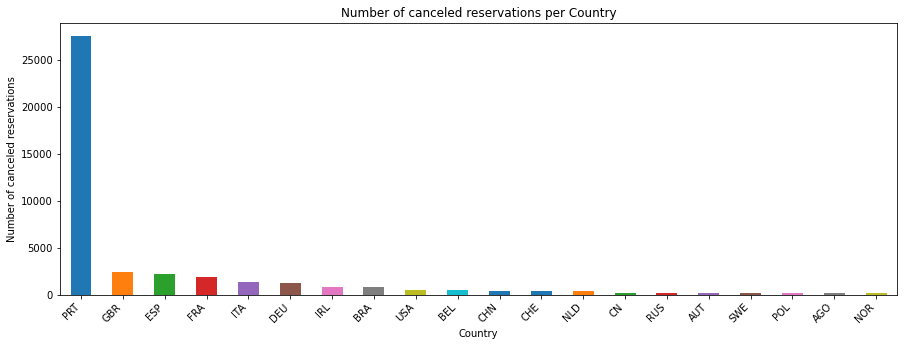

country
PRT      27519
GBR       2453
ESP       2177
FRA       1934
ITA       1333
DEU       1218
IRL        832
BRA        830
USA        501
BEL        474
CHN        462
CHE        428
NLD        387
CN         254
RUS        239
AUT        230
SWE        227
POL        215
AGO        205
NOR        181
ISR        169
ROU        134
MAR        109
LUX        109
DNK        109
AUS        107
TUR        102
HUN         77
FIN         69
N. A.       67
         ...  
VNM          2
ARM          2
CIV          2
ALB          2
UZB          2
GHA          2
ZWE          2
PRI          2
KEN          2
MYT          2
MNE          2
GAB          2
GLP          2
MKD          2
IMN          2
KHM          2
MUS          1
VGB          1
MCO          1
LIE          1
CRI          1
ZMB          1
TMP          1
HND          1
GNB          1
UMI          1
FJI          1
SYC          1
ETH          1
NIC          1
Name: country, Length: 128, dtype: int64

In [11]:
def show_countries_canceled():
    countries = dataset[dataset.is_canceled == 1].groupby('country').country.count().sort_values(ascending = False)
    
    plt.figure(figsize = (15, 5))
    ax = countries.head(20).plot(kind = 'bar')
    ax.set_title('Number of canceled reservations per Country')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number of canceled reservations')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    plt.show()
    
    return countries

show_countries_canceled()

可视化每个国家取消酒店的顾客人数，可以看出大部分顾客来自于葡萄牙、其次是北爱尔兰和西班牙。

### 5. 一年中最佳预订酒店时间

查看每个月城市酒店和假日酒店的预约数量

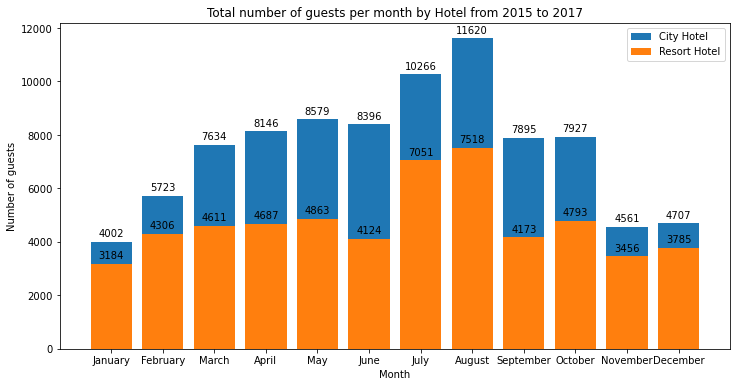

,month,hotel,guests
8,January,City Hotel,4002
9,January,Resort Hotel,3184
6,February,City Hotel,5723
7,February,Resort Hotel,4306
15,March,Resort Hotel,4611
14,March,City Hotel,7634
0,April,City Hotel,8146
1,April,Resort Hotel,4687
17,May,Resort Hotel,4863
16,May,City Hotel,8579


In [12]:
def guests_month():
    info = ['arrival_date_month', 'hotel', 'is_canceled', 'adults', 'children', 'babies']
    guests = dataset.loc[dataset.is_canceled == 0, info]
    guests['total_guests'] = guests.adults + guests.children + guests.babies
    guests.total_guests = guests.total_guests.astype(int)
    
    guests = guests.groupby(['arrival_date_month', 'hotel']) \
                   .aggregate({'total_guests' : sum}) \
                   .reset_index()
    
    guests.columns = ['month', 'hotel', 'guests']
        
    months = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
        
    guests.month = pd.Categorical(guests.month, categories = months, ordered = True)
    
    guests.sort_values('month', inplace = True)
    
    hotels = guests.hotel.unique()
    fig, ax = plt.subplots(figsize = (12, 6))
    bars = []
        
    for i in range(len(hotels)):
        bars.append(ax.bar(guests.loc[guests.hotel == hotels[i], 'month'], \
                           guests.loc[guests.hotel == hotels[i], 'guests'], \
                           label = hotels[i]))
        auto_label(ax, bars[i])
        
    anos = dataset.arrival_date_year.unique()
    plt.title(f'Total number of guests per month by Hotel from {min(anos)} to {max(anos)}')
    plt.xlabel('Month')
    plt.ylabel('Number of guests')
    plt.legend()
    plt.show()
    
    return guests

guests_month()

从结果看出，每年的7月、8月酒店的预定量最多，说明这是旅游的旺季，而每年的11月、12月、1月酒店预定量最少，这是旅游的淡季。所以为了避免高峰出游，时间充足的小伙伴可以选择5月、6月、9月、10月这些月份旅游，此时酒店相对来说好预定且可以玩有所值。

### 6. 顾客关注的酒店价格以及顾客平均住店时间 

#### 6.1  城市酒店和假日酒店每晚人均消费

In [13]:
def average_daily_rate_person():
    for h in dataset.hotel.unique():
        print(f'Average daily rate per person: {dataset[dataset.hotel == h].adr.mean():.2f} in {h}.')
    return

average_daily_rate_person()

Average daily rate per person: 94.95 in Resort Hotel.
Average daily rate per person: 105.30 in City Hotel.


从结果来看城市酒店的人均消费价格略高于假日酒店，一部分原因可能是城市酒店地处较繁华的地段，相对来说地价会贵一些。

#### 6.2 城市酒店和假日酒店的顾客平均住店时间

In [14]:
def average_stay_days():
    stay = dataset.loc[dataset.is_canceled == 0, ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']] 
    stay['nights'] = stay.stays_in_week_nights + stay.stays_in_weekend_nights    
    stay = stay.groupby('hotel').agg({'nights' : 'mean'})
    
    return stay

average_stay_days()

,nights
hotel,
City Hotel,2.923618
Resort Hotel,4.142892


从结果来看假日酒店的人均住店时间略高于城市酒店，我想原因可能是假日酒店一般接待的是游客，游客的游玩时间较长。另外假日酒店的价格略便宜一些，游客也更愿意停留。

### 7. 预测酒店预订是否取消

In [15]:
#导入包
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [16]:
dataset = dataset.drop_duplicates()

In [17]:
y = dataset["is_canceled"]
X = dataset.drop(["is_canceled"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)


num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

#训练集和测试集的准备
x_train = x_train[num_features + cat_features].copy()
x_test = x_test[num_features + cat_features].copy()

num_transformer = SimpleImputer(strategy="constant")


cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', cat_transformer, cat_features)])

#### 7.1  采用XGBoost模型进行预测

In [18]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=1000, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,random_state=101)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

from sklearn.metrics import classification_report
from sklearn import metrics

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,predictions))

confusion_matrix=metrics.confusion_matrix(y_test,predictions)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])

precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])

f1_score = (2*sensitivity*precision)/(sensitivity+precision)
print('f1_score1 :% .2f '% f1_score)

Accuracy: 81.52%
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     18936
           1       0.72      0.55      0.62      7283

    accuracy                           0.82     26219
   macro avg       0.78      0.73      0.75     26219
weighted avg       0.81      0.82      0.81     26219

f1_score1 : 0.88 


#### 7.2 采用K最近邻分类器进行预测

In [19]:
model = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski')
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

from sklearn.metrics import classification_report
from sklearn import metrics

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,predictions))

confusion_matrix=metrics.confusion_matrix(y_test,predictions)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])

precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])

f1_score = (2*sensitivity*precision)/(sensitivity+precision)
print('f1_score :% .2f '% f1_score)

Accuracy: 71.27%
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     18936
           1       0.48      0.35      0.41      7283

    accuracy                           0.71     26219
   macro avg       0.63      0.60      0.61     26219
weighted avg       0.69      0.71      0.70     26219

f1_score : 0.81 


#### 7.3 采用决策树进行预测 

In [20]:
model = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

from sklearn.metrics import classification_report
from sklearn import metrics

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,predictions))

confusion_matrix=metrics.confusion_matrix(y_test,predictions)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])

precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])

f1_score = (2*sensitivity*precision)/(sensitivity+precision)
print('f1_score :% .2f '% f1_score)

Accuracy: 75.37%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     18936
           1       0.56      0.56      0.56      7283

    accuracy                           0.75     26219
   macro avg       0.69      0.69      0.69     26219
weighted avg       0.75      0.75      0.75     26219

f1_score : 0.83 


#### 7.4 采用随机森林进行预测

In [21]:
model = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

from sklearn.metrics import classification_report
from sklearn import metrics

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,predictions))

confusion_matrix=metrics.confusion_matrix(y_test,predictions)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])

precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])

f1_score = (2*sensitivity*precision)/(sensitivity+precision)
print('f1_score :% .2f '% f1_score)

Accuracy: 81.65%
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     18936
           1       0.72      0.55      0.63      7283

    accuracy                           0.82     26219
   macro avg       0.78      0.74      0.75     26219
weighted avg       0.81      0.82      0.81     26219

f1_score : 0.88 


#### 7.5 采用Bagging分类器进行预测

In [22]:
model = BaggingClassifier(base_estimator=None,
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

from sklearn.metrics import classification_report
from sklearn import metrics

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,predictions))

confusion_matrix=metrics.confusion_matrix(y_test,predictions)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])

precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])

f1_score = (2*sensitivity*precision)/(sensitivity+precision)
print('f1_score :% .2f '% f1_score)

Accuracy: 80.34%
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     18936
           1       0.69      0.52      0.60      7283

    accuracy                           0.80     26219
   macro avg       0.76      0.72      0.73     26219
weighted avg       0.79      0.80      0.79     26219

f1_score : 0.87 


#### 7.6 采用AdaBoost分类器进行预测

In [23]:
model = AdaBoostClassifier(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

from sklearn.metrics import classification_report
from sklearn import metrics

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,predictions))

confusion_matrix=metrics.confusion_matrix(y_test,predictions)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])

precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])

f1_score = (2*sensitivity*precision)/(sensitivity+precision)
print('f1_score :% .2f '% f1_score)

Accuracy: 80.37%
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     18936
           1       0.73      0.46      0.57      7283

    accuracy                           0.80     26219
   macro avg       0.78      0.70      0.72     26219
weighted avg       0.79      0.80      0.79     26219

f1_score : 0.87 


#### 7.7 采用Logistic逻辑回归进行预测

In [24]:
model = LogisticRegression(penalty='l2',
    dual=False, 
    tol=0.0001,
    C=1.0, 
    fit_intercept=True, 
    intercept_scaling=1, 
    class_weight=None, 
    random_state=None, 
    solver='liblinear', 
    max_iter=100, 
    multi_class='ovr', 
    verbose=0,
    warm_start=False, 
    n_jobs=1)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

from sklearn.metrics import classification_report
from sklearn import metrics

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test,predictions))

confusion_matrix=metrics.confusion_matrix(y_test,predictions)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])

precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])

f1_score = (2*sensitivity*precision)/(sensitivity+precision)
print('f1_score :% .2f '% f1_score)

Accuracy: 78.64%
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     18936
           1       0.71      0.39      0.51      7283

    accuracy                           0.79     26219
   macro avg       0.75      0.67      0.68     26219
weighted avg       0.77      0.79      0.76     26219

f1_score : 0.86 


在用不同的分类器进行预测后，发现使用随机森林和XGBoost模型的效果最好，他们的f1 score最大，表示他们具有最佳的精度—召回率平衡